In [12]:
# Function for generating histogram
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
import datetime 
import import_ipynb
import histplot
from sklearn.linear_model import LinearRegression 
import scipy
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
ASC = '__ASC_ASCIIIn.mrk'
direct = 'C:/Users/tyron/Documents/Geoscience/weather/'

In [4]:
Whole18 = histplot.getData(18, direct, ASC, 1, 365, np.arange(3, 7), float)
Whole19 = histplot.getData(19, direct, ASC, 1, 365, np.arange(3, 7), float)
Whole20 = histplot.getData(20, direct, ASC, 1, 366, np.arange(3, 7), float)

In [5]:
print(Whole18.shape)
Whole18 = Whole18[~np.isnan(Whole18).any(axis = 1), :]
print(Whole18.shape)

(525589, 4)
(525562, 4)


In [6]:
print(Whole19.shape)
Whole19 = Whole19[~np.isnan(Whole19).any(axis = 1), :]
print(Whole19.shape)

(525586, 4)
(525563, 4)


In [7]:
print(Whole20.shape)
Whole20 = Whole20[~np.isnan(Whole20).any(axis = 1), :]
print(Whole20.shape)

(527016, 4)
(526973, 4)


In [9]:
# Let's offset these by 10 minutes so 0 to -10 and 9 to whatever
whole18_10_set = Whole18[:-10, np.arange(0, 3)]
whole18_10_p = Whole18[10: , 3]
print(whole18_10_set.shape)
print(whole18_10_p.shape)

(525552, 3)
(525552,)


Text(0.5, 1.0, 'Decision Tree regression of Air Pressure and Precipitation')

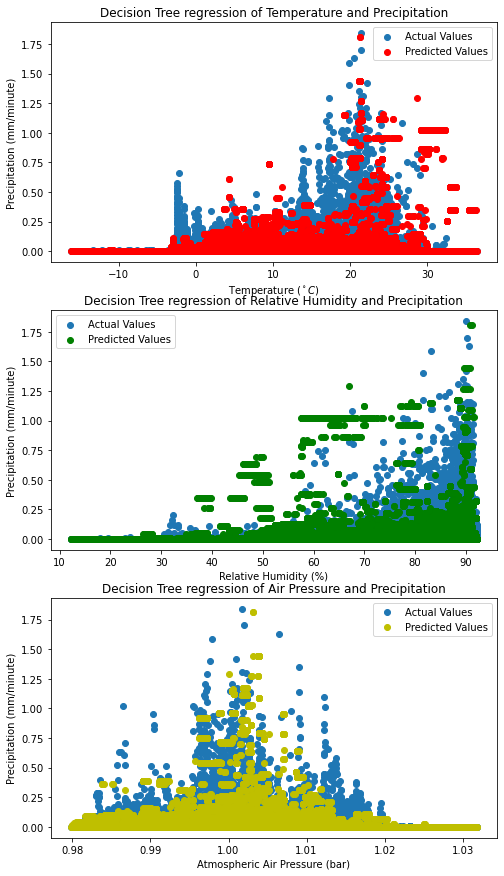

In [11]:
from sklearn.tree import DecisionTreeRegressor
newclf = DecisionTreeRegressor()
newclf = newclf.fit(whole18_10_set, whole18_10_p)
newpredict2019 = newclf.predict(Whole19[:, np.arange(0, 3)])
plt.figure(figsize = (8, 15))
plt.subplot(3, 1, 1)
plt.scatter(Whole19[:, 0], Whole19[:, 3])
plt.scatter(Whole19[:, 0], newpredict2019, color = 'r')
plt.legend(['Actual Values', 'Predicted Values'])
plt.xlabel('Temperature ($^\circ C$)')
plt.ylabel('Precipitation (mm/minute)')
plt.title('Decision Tree regression of Temperature and Precipitation')
plt.subplot(3, 1, 2)
plt.scatter(Whole19[:, 1], Whole19[:, 3])
plt.scatter(Whole19[:,1], newpredict2019, color = 'g')
plt.legend(['Actual Values', 'Predicted Values'])
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Precipitation (mm/minute)')
plt.title('Decision Tree regression of Relative Humidity and Precipitation')
plt.subplot(3, 1, 3)
plt.scatter(Whole19[:, 2], Whole19[:, 3])
plt.scatter(Whole19[:,2], newpredict2019, color = 'y')
plt.legend(['Actual Values', 'Predicted Values'])
plt.xlabel('Atmospheric Air Pressure (bar)')
plt.ylabel('Precipitation (mm/minute)')
plt.title('Decision Tree regression of Air Pressure and Precipitation')

Coefficients: 
 [-3.25277547e-05  1.36990815e-04 -1.46662515e-01]
Mean squared error: 0.00053
Coefficient of determination: 0.01


Text(0.5, 1.0, 'Linear Regression for Air Pressure and Precipitation')

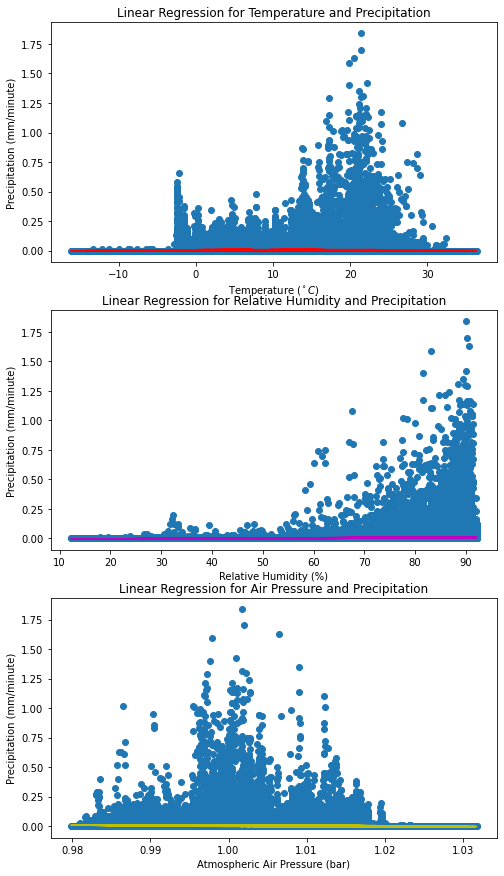

In [7]:
# This trains using a dataset, and uses that to predict the future! 
# Shows that its not particularly good. 
reg = LinearRegression()
reg.fit(Whole18[:, np.arange(0, 3)], Whole18[:, 3])
predict2019 = reg.predict(Whole19[:,np.arange(0, 3)])
plt.figure(figsize = (8, 15))
plt.subplot(3, 1, 1)
plt.scatter(Whole19[:, 0], Whole19[:, 3])
plt.plot(Whole19[:, 0], predict2019, color = 'r')
plt.xlabel('Temperature ($^\circ C$)')
plt.ylabel('Precipitation (mm/minute)')
plt.title('Linear Regression for Temperature and Precipitation')
print('Coefficients: \n', reg.coef_)
print('Mean squared error: %.5f'
     % mean_squared_error(Whole19[:, 3], predict2019))
print('Coefficient of determination: %.2f'
      % r2_score(Whole19[:,3], predict2019))
plt.subplot(3, 1, 2)
plt.scatter(Whole19[:, 1], Whole19[:, 3])
plt.plot(Whole19[:, 1], predict2019, color = 'm')
plt.ylabel('Precipitation (mm/minute)')
plt.xlabel('Relative Humidity (%)')
plt.title('Linear Regression for Relative Humidity and Precipitation')

plt.subplot(3,1,3)
plt.scatter(Whole19[:, 2], Whole19[:, 3])
plt.plot(Whole19[:, 2], predict2019, color = 'y')
plt.ylabel('Precipitation (mm/minute)')
plt.xlabel('Atmospheric Air Pressure (bar)')
plt.title('Linear Regression for Air Pressure and Precipitation')

In [8]:
# Try another approach! Decision Tree for example
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

Text(0.5, 1.0, 'Decision Tree regression of Air Pressure and Precipitation')

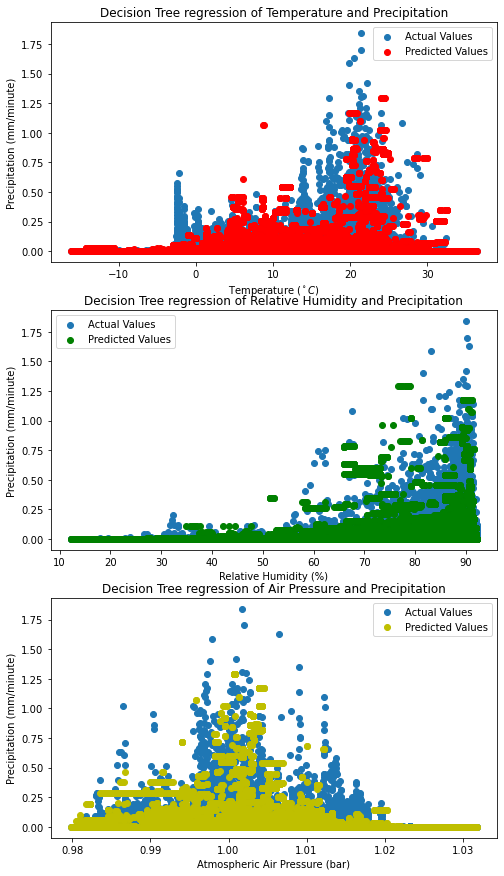

In [9]:
from sklearn.tree import DecisionTreeRegressor
newclf = DecisionTreeRegressor()
newclf = newclf.fit(Whole18[:, np.arange(0, 3)], Whole18[:, 3])
newpredict2019 = newclf.predict(Whole19[:, np.arange(0, 3)])
plt.figure(figsize = (8, 15))
plt.subplot(3, 1, 1)
plt.scatter(Whole19[:, 0], Whole19[:, 3])
plt.scatter(Whole19[:, 0], newpredict2019, color = 'r')
plt.legend(['Actual Values', 'Predicted Values'])
plt.xlabel('Temperature ($^\circ C$)')
plt.ylabel('Precipitation (mm/minute)')
plt.title('Decision Tree regression of Temperature and Precipitation')
plt.subplot(3, 1, 2)
plt.scatter(Whole19[:, 1], Whole19[:, 3])
plt.scatter(Whole19[:,1], newpredict2019, color = 'g')
plt.legend(['Actual Values', 'Predicted Values'])
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Precipitation (mm/minute)')
plt.title('Decision Tree regression of Relative Humidity and Precipitation')
plt.subplot(3, 1, 3)
plt.scatter(Whole19[:, 2], Whole19[:, 3])
plt.scatter(Whole19[:,2], newpredict2019, color = 'y')
plt.legend(['Actual Values', 'Predicted Values'])
plt.xlabel('Atmospheric Air Pressure (bar)')
plt.ylabel('Precipitation (mm/minute)')
plt.title('Decision Tree regression of Air Pressure and Precipitation')

Text(0, 0.5, 'Predicted Value')

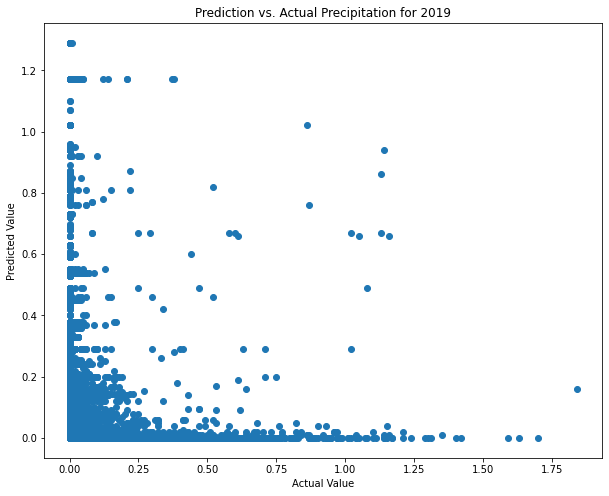

In [12]:
plt.figure(figsize = (10, 8))
plt.scatter( Whole19[:, 3] ,newpredict2019)
plt.title('Prediction vs. Actual Precipitation for 2019')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

Text(0.45, 0.8, 'DT total Precipitation: 2785 mm')

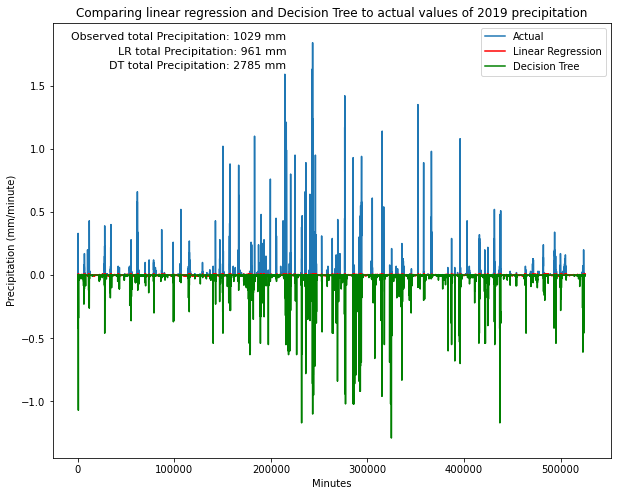

In [111]:
plt.figure(figsize= (10, 8))
plt.plot(Whole19[:, 3])
plt.plot(predict2019, color = 'r')
plt.plot(-newpredict2019, color = 'g')
plt.legend(['Actual', 'Linear Regression', 'Decision Tree'])
plt.xlabel('Minutes')
plt.ylabel('Precipitation (mm/minute)')
plt.title('Comparing linear regression and Decision Tree to actual values of 2019 precipitation')
plt.figtext(0.45, 0.85, 'Observed total Precipitation: ' + str(round(np.nansum(Whole19[:, 3]))) + ' mm', fontsize = 11, ha = 'right')
plt.figtext(0.45, 0.825, 'LR total Precipitation: ' + str(round(np.nansum(predict2019))) + ' mm', fontsize = 11, ha = 'right')
plt.figtext(0.45, 0.8, 'DT total Precipitation: ' + str(round(np.nansum(newpredict2019))) + ' mm', fontsize = 11, ha = 'right')


In [11]:
print(np.sum(Whole19[:, 3]))
print(np.sum(predict2019))
print(np.sum(newpredict2019))

1028.5700000000002
960.7632659783857
2784.7958571428567


Text(0.5, 1.0, 'Decision Tree regression of Air Pressure and Precipitation')

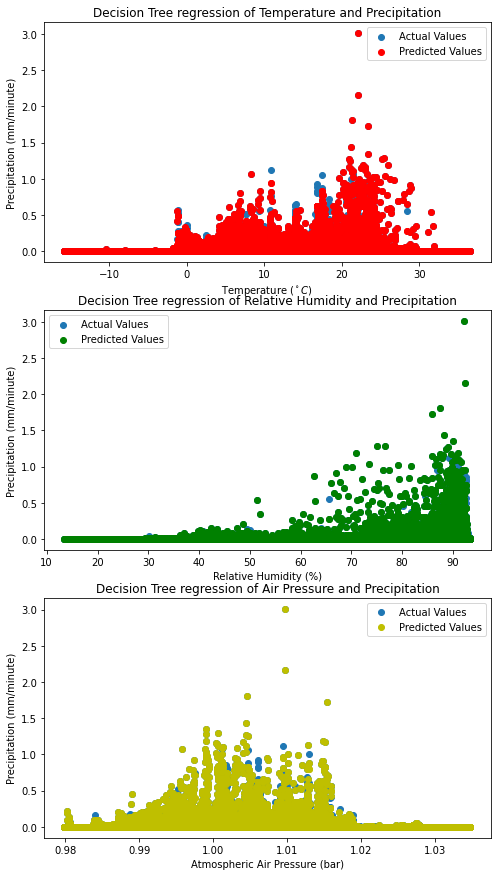

In [63]:
look18 = DecisionTreeRegressor()
look18 = look18.fit(Whole18[:, np.arange(0, 3)], Whole18[:, 3])
predict18 = look18.predict(Whole18[:, np.arange(0, 3)])
plt.figure(figsize = (8, 15))
plt.subplot(3, 1, 1)
plt.scatter(Whole18[:, 0], Whole18[:, 3])
plt.scatter(Whole18[:, 0], predict18, color = 'r')
plt.legend(['Actual Values', 'Predicted Values'])
plt.xlabel('Temperature ($^\circ C$)')
plt.ylabel('Precipitation (mm/minute)')
plt.title('Decision Tree regression of Temperature and Precipitation')
plt.subplot(3, 1, 2)
plt.scatter(Whole18[:, 1], Whole18[:, 3])
plt.scatter(Whole18[:,1], predict18, color = 'g')
plt.legend(['Actual Values', 'Predicted Values'])
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Precipitation (mm/minute)')
plt.title('Decision Tree regression of Relative Humidity and Precipitation')
plt.subplot(3, 1, 3)
plt.scatter(Whole18[:, 2], Whole18[:, 3])
plt.scatter(Whole18[:,2], predict18, color = 'y')
plt.legend(['Actual Values', 'Predicted Values'])
plt.xlabel('Atmospheric Air Pressure (bar)')
plt.ylabel('Precipitation (mm/minute)')
plt.title('Decision Tree regression of Air Pressure and Precipitation')

In [38]:
print(len(Whole18[:,3]))

525589


In [57]:
minute = 0
Hour2018 = np.zeros((8760, 4))
hour = 0
endminute = 60
while (minute < len(Whole18[:, 3]) and hour < 8760):
    temp = np.nanmean(Whole18[np.arange(minute, endminute), 0])
    relhum = np.nanmean(Whole18[np.arange(minute, endminute), 1])
    air_p = np.nanmean(Whole18[np.arange(minute, endminute), 2])
    precip = np.nansum(Whole18[np.arange(minute, endminute), 3])
    if (minute+60 < len(Whole18[:, 3])):
        minute += 60
    if (minute+60 < len(Whole18[:, 3])):
        endminute = minute + 60
    else:
        endminute = len(Whole18[:, 3])
    
    Hour2018[hour, 0] = temp
    Hour2018[hour, 1] = relhum
    Hour2018[hour, 2] = air_p
    Hour2018[hour, 3] = precip
    hour += 1
       

In [49]:
print(Hour2018)

[[-10.955       45.36166667   1.01777833   0.        ]
 [-11.40166667  46.405        1.01787667   0.        ]
 [-11.61666667  47.42666667   1.01802      0.        ]
 ...
 [  5.95333333  85.53833333   1.012345     0.88      ]
 [  5.77        88.46666667   1.01149      0.61      ]
 [  5.92653061  89.06530612   1.01028367   0.09      ]]


In [58]:
def hourly(weather):
    minute = 0
    Hourly = np.zeros((8760, 4))
    hour = 0
    endminute = 60
    while (minute < len(weather[:, 3]) and hour < 8760):
        temp = np.nanmean(weather[np.arange(minute, endminute), 0])
        relhum = np.nanmean(weather[np.arange(minute, endminute), 1])
        air_p = np.nanmean(weather[np.arange(minute, endminute), 2])
        precip = np.nansum(weather[np.arange(minute, endminute), 3])
        if (minute+60 < len(weather[:, 3])):
            minute += 60
        if (minute+60 < len(weather[:, 3])):
            endminute = minute + 60
        else:
            endminute = len(weather[:, 3])
        Hourly[hour, 0] = temp
        Hourly[hour, 1] = relhum
        Hourly[hour, 2] = air_p
        Hourly[hour, 3] = precip
        hour += 1
    
    return Hourly

In [59]:
# Starting to attempt Aritifical Neural Networks
Hour2019 = hourly(Whole19)
print(Hour2019)

[[ 6.34166667 88.975       1.00883167  0.11      ]
 [ 6.57666667 89.68666667  1.00678167  0.25      ]
 [ 6.80833333 90.14333333  1.00485667  4.71      ]
 ...
 [ 6.62       70.27333333  0.9946      0.        ]
 [ 6.55666667 69.80333333  0.99467333  0.        ]
 [ 6.48695652 71.28043478  0.99458696  0.        ]]


In [60]:
Hour2020 = hourly(Whole20)
print(Hour2020)

[[ 6.355      72.15        0.99464     0.        ]
 [ 6.39       69.27666667  0.99527667  0.        ]
 [ 6.23666667 60.30833333  0.99526667  0.        ]
 ...
 [ 4.56666667 47.42166667  1.01442167  0.        ]
 [ 4.04666667 50.32333333  1.01376     0.        ]
 [ 3.58       54.32        1.01281833  0.        ]]


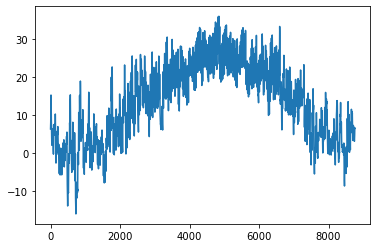

In [61]:
plt.plot(Hour2019[:, 0])

In [82]:
step = 60 
split_fraction = 0.715
train_split = int(split_fraction*len(Whole18[:, 3]))

past = 720
future = 72 
learning_rate = 0.001
batch_size = 256
epochs = 10 
def normalize(data, train_split):
    data_mean = np.nanmean(data[:train_split])
    data_std = np.nanstd(data[:train_split])
    return (data - data_mean) / data_std

In [83]:
features = normalize(Whole18, train_split)


In [84]:
print(features)

[[-1.09721195  0.92695115 -0.6638515  -0.7002471 ]
 [-1.09721195  0.91979863 -0.6638515  -0.7002471 ]
 [-1.09721195  0.91264611 -0.6638515  -0.7002471 ]
 ...
 [-0.48209525  2.50408177 -0.66414118 -0.7002471 ]
 [-0.47851899  2.49692925 -0.66414476 -0.7002471 ]
 [-0.48209525  2.48977673 -0.66414476 -0.7002471 ]]


In [85]:
train_data = features[0:train_split-1]
val_data = features[train_split:]

In [86]:
print(train_data)

[[-1.09721195  0.92695115 -0.6638515  -0.7002471 ]
 [-1.09721195  0.91979863 -0.6638515  -0.7002471 ]
 [-1.09721195  0.91264611 -0.6638515  -0.7002471 ]
 ...
 [ 0.07937756  2.23586227 -0.6644845  -0.7002471 ]
 [ 0.07937756  2.23943853 -0.6644845  -0.7002471 ]
 [ 0.07937756  2.23943853 -0.6644845  -0.7002471 ]]


In [87]:
print(val_data)

[[ 0.07937756  2.24301479 -0.6644845  -0.7002471 ]
 [ 0.0758013   2.24301479 -0.6644845  -0.7002471 ]
 [ 0.0758013   2.24301479 -0.6644845  -0.7002471 ]
 ...
 [-0.48209525  2.50408177 -0.66414118 -0.7002471 ]
 [-0.47851899  2.49692925 -0.66414476 -0.7002471 ]
 [-0.48209525  2.48977673 -0.66414476 -0.7002471 ]]


In [88]:
start = past + future
end = start + train_split

x_train = train_data[:, np.arange(0, 3)]
y_train = train_data[:, 3]

sequence_length = int(past / step)

In [89]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [90]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data[:, np.arange(0, 3)]
y_val = val_data[:, 3]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)
for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 12, 3)
Target shape: (256,)


In [91]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 12, 3)]           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                4608      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 4,641
Trainable params: 4,641
Non-trainable params: 0
_________________________________________________________________


In [92]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10
1465/1466 [============================>.] - ETA: 0s - loss: 0.0047
Epoch 00001: val_loss improved from inf to 0.00196, saving model to model_checkpoint.h5
1466/1466 [==============================] - 36s 25ms/step - loss: 0.0047 - val_loss: 0.0020
Epoch 2/10
1464/1466 [============================>.] - ETA: 0s - loss: 8.1479e-05
Epoch 00002: val_loss improved from 0.00196 to 0.00001, saving model to model_checkpoint.h5
1466/1466 [==============================] - 36s 25ms/step - loss: 8.1420e-05 - val_loss: 9.4815e-06
Epoch 3/10
1464/1466 [============================>.] - ETA: 0s - loss: 4.4555e-05
Epoch 00003: val_loss did not improve from 0.00001
1466/1466 [==============================] - 38s 26ms/step - loss: 4.4525e-05 - val_loss: 1.9230e-04
Epoch 4/10
1464/1466 [============================>.] - ETA: 0s - loss: 2.8836e-05
Epoch 00004: val_loss did not improve from 0.00001
1466/1466 [==============================] - 41s 28ms/step - loss: 2.8821e-05 - val_loss: 6.681

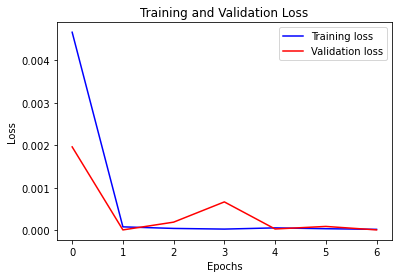

In [93]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

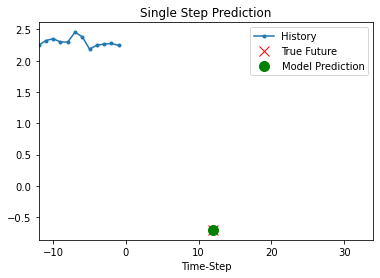

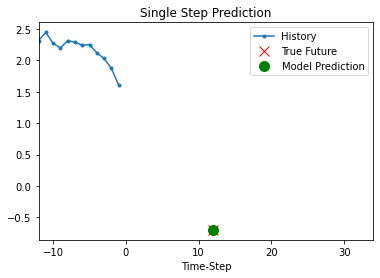

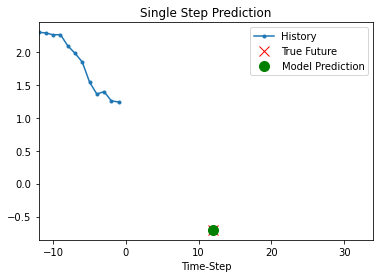

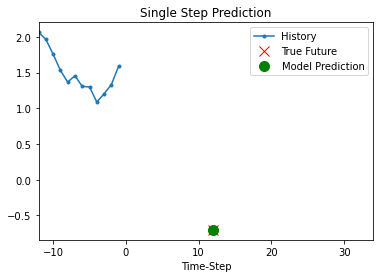

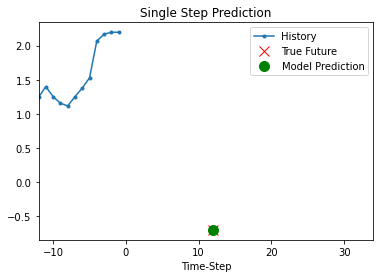

In [94]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0
    
    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return

for x, y in dataset_val.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )

In [95]:
import pandas as pd

In [97]:
df = pd.DataFrame(Whole18, columns = ['Temperature', 'Relative Humidity', 'Air Pressure', 'Precipitation'])
print(df)

        Temperature  Relative Humidity  Air Pressure  Precipitation
0             -11.1               45.5        1.0177            0.0
1             -11.1               45.3        1.0177            0.0
2             -11.1               45.1        1.0177            0.0
3             -11.1               46.2        1.0177            0.0
4             -11.1               45.4        1.0177            0.0
...             ...                ...           ...            ...
525557          6.0               89.5        1.0097            0.0
525558          6.1               89.4        1.0096            0.0
525559          6.1               89.6        1.0096            0.0
525560          6.2               89.4        1.0095            0.0
525561          6.1               89.2        1.0095            0.0

[525562 rows x 4 columns]
